# Homework 1

## Network Characteristics

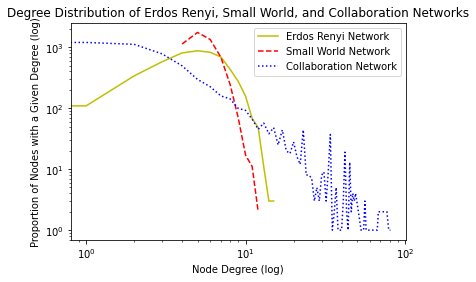

Clustering Coefficient for Erdos Renyi Network: 0.000567
Clustering Coefficient for Small World Network: 0.284245
Clustering Coefficient for Collaboration Network: 0.529636


In [1]:
import numpy as np
from math import ceil
import hw1_q1_starter as hq1
import hw1_q2_starter as hq2
import snap
import matplotlib.pyplot as plt
import networkx as nx
np.random.seed(1234)

From the plot, we can see that the degree distributions in both Small World and Erdos-Renyi are closer to the mean degree than the real network, where nodes with high and low degree appear more likely. This means that these random networks underestimate the frequency of high and low degree node.  

The difference in the resulting difference in clustering coefficient could intuitively be explained by saying that given a node, a scientist who cooperated with the one represented by our node is more likely to cooperate with people linked to our node than other random scientists in the field.
Further analysis is needed to understand this phenomenon fully.

## Structural Roles: Rolx and ReFex

In [442]:
GCollab = hq2.load_netscience_graph()

### Basic Features

In [443]:
hq2.get_basic_features(9, GCollab)

array([ 6, 10,  1])

In [444]:
hq2.topk_most_similar(9, GCollab)

[(0.9996157540684272, 415),
 (0.996343680627828, 286),
 (0.996343680627828, 288),
 (0.9961182380000687, 1054),
 (0.9961182380000687, 1336)]

### Recursive Features

In [447]:
features_matrix = hq2.get_recursive_features(GCollab, K=2)
hq2.topk_most_similar_feature_matrix(9, features_matrix)

[(0.9959848829010806, 973),
 (0.9946130044020558, 537),
 (0.993728442523926, 415),
 (0.9922839741918226, 496),
 (0.9922413199302673, 25)]

We have obtained different most similar nodes by using recursive feature, since now each node embed information coming from nodes more far away and in this sense its features encode a less local and more global structure compare to the previous basic features

### Role Discovery

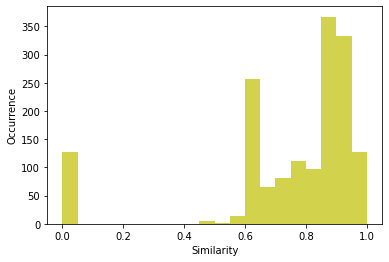

In [473]:
reload(hq2)
n, hbins, patches, similarities = hq2.plot_similarity_distribution(9, features_matrix)

We recompute the bin with a new function for a further look at the number of occurrence on the spikes in the plot.
We will sample a node from each of the most frequent bin and we will plot the subgraph which belongs.

In [475]:
reload(hq2)
bin_dict, bins = hq2.digitize_similarities(features_matrix, node_id=9)

We can sample from the bins 17+18, 12, 0 

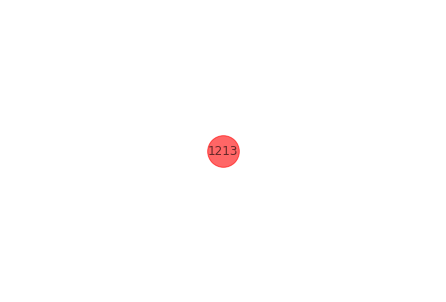

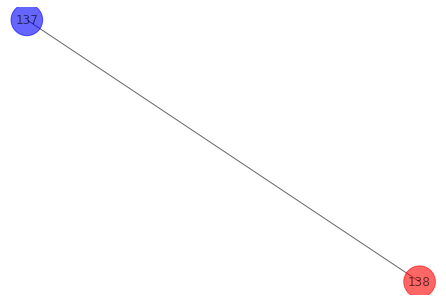

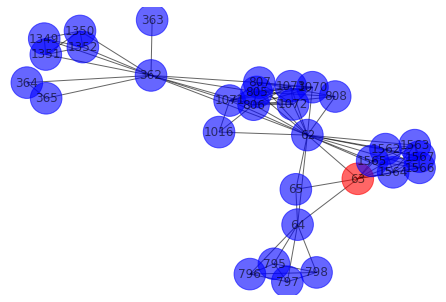

In [1058]:
reload(hq2)
ego = int(np.random.choice(bin_dict[0]))
hq2.draw_subgraph_node(ego, GCollab)
ego = int(np.random.choice(bin_dict[12]))
hq2.draw_subgraph_node(ego, GCollab)
ego = int(np.random.choice(bin_dict[18]))
hq2.draw_subgraph_node(ego, GCollab)


All the nodes in the bin 0 are isolated, whereas the node in bin 12 have typically a limited amount of neighbours which sometimes corresponds to hub or authorities. Nodes with higher similarity to node 9 are integrated part of communities.

## Community detection using the Louvain algorithm


Let be $2m= \sum_i\sum_j A_{ij}$ and $\delta(c_i, c_j) = 1$ if $c_i = c_j$ and $0$ otherwhise
$$Q = \frac{1}{2m} \sum_{1 \le i, j \le n}\left[A_{ij} - \frac{d_i d_j}{2m} \right]\delta(c_i, c_j)$$
$$\Delta Q = Q'' - Q'$$

$$Q'' = \frac{1}{2m}\left( \sum_i\sum_j A_{ij}\delta(c_i,c_j) - \sum_{i \in \mathcal{C}} d_i \sum_{j \in \mathcal{C}} d_j \right) = \\
= \frac{1}{2m} \left( \Sigma_{in} + \frac{2 k_{i,in}}{2} - \left(\frac{(\Sigma_{tot} + k_{i})(\Sigma_{tot} + k_{i})}{2m}\right)\right) = 
\\
= \frac{\Sigma_{in} + k_{i,in}}{2m} - \left(\frac{\Sigma_{tot} + k_{i}}{2m}\right)^2$$ 

$$Q' = \frac{1}{2m}\left( \sum_i\sum_j A_{ij}\delta(c_i,c_j) - \left( \sum_{i \in \mathcal{C}} d_i \sum_{j \in \mathcal{C}} d_j + \sum_{i \notin \mathcal{C}} d_i \sum_{j \notin \mathcal{C}} d_j \right) \right) = 
\\ =\frac{1}{2m} \left( \Sigma_{in} - \frac{\Sigma_{tot}^2}{2m} - \frac{k_{i}^2}{2m} \right) =
\\
 = \left( \frac{\Sigma_{in}}{2m} - \left( \frac{\Sigma_{tot}}{2m}\right)^2 - \left( \frac{k_{i}}{2m} \right)^2 \right)$$
 
 
$$\Delta Q = \left[ \frac{\Sigma_{in} + k_{i,in}}{2m} - \left(\frac{\Sigma_{tot} + k_{i}}{2m}\right)^2 \right] - \left[ \left( \frac{\Sigma_{in}}{2m} - \left( \frac{\Sigma_{tot}}{2m}\right)^2 - \left( \frac{k_{i}}{2m} \right)^2 \right) \right]$$

- What is the weight of any edge? 1 
- What is the weight of any self-edge in H? 12
- What is the modularity of H?

In [1098]:
m = 28
Q_H = 1/(2*m) * 4*(12 - 14**2/(2*m))
Q_H

0.6071428571428571

- What is the weight of any edge between two distinct nodes in J? 2
- What is the weight of any self-edge in J? 26
- What is the modularity of J

In [1100]:
Q_J = 1/(2*m) * 2 * (26 - 28**2/(2*m))
Q_J

0.42857142857142855

- What is the weight of any edge between two distinct nodes in H big? 1
- What is the weight of any self-edge in $H_{big}$? 12
- What is the modularity of H big (with each node in its own community)?

In [1149]:
m_big = 224
Q_H_big = 1/(2*m_big) * 32*(12 - 14**2/(2*m_big))
Q_H_big

0.8258928571428571

- What is the weight of any edge between two distinct nodes in $J_{big}$? 1
- What is the weight of any self-edge in $J_{big}$? 14
- What is the modularity of H big (with each node in its own community)?

In [1150]:
Q_J_big = 1/(2*m_big) * 16*(26 - 28**2/(2*m_big))
Q_J_big

0.8660714285714285

In [1138]:
Q_J_big = 1/(2*m_big) * 8*(52 - 54**2/(2*m_big))
Q_J_big

0.8123405612244898

It could be de case that for how the metric is conceived the penality of the second term in the modularity $\frac{d_i d_j}{2m}$ start to be effective when its magnitude is comparable with $A_{ij}$ so by merging the two clique we have a marginal increment of the modularity. Hence this situation could be considered an artifact deriving from the use of this metric.

- (i) Since each term of the summation corresponds to a Laplacian matrix of a graph with an only edge between a pair of node. Specifically $(e_i - e_j)(e_i - e_j)^T$ corresponds to a graph with an edge between $i$ and $j$ with weight 1.
For $\vert E \vert = 2$ we have
$$L=(e_i - e_j)(e_i - e_j)^T + (e_{i+1} - e_{j+1})(e_{i+1} - e_{j+1})^T$$
By inductive hypothesis for $\vert E \vert = k$ follows:
$$L=\sum_{(i,j) \in E}^k(e_i - e_j)(e_i - e_j)^T$$

- (ii) $$x^T L x= \sum_{(i,j) \in E}^k x (e_i - e_j)(e_i - e_j)^T x$$ 
Since in the $e_i$ and $e_j$ vector the only non zero element is respectively the one in position $i$ and $j$ it follows:
$$x^T L x= \sum_{(i,j) \in E}^k (x_i - x_j)^2 $$

- (iii) $$x^T L x= \sum_{(i,j) \in E}^k (x_i - x_j)^2 = \\
= \sum_{i\in S, j \in \bar{S}} \left( \sqrt{ \frac{Vol(\bar{S})}{Vol(S)}} +  \sqrt{ \frac{Vol(S)}{Vol(\bar{S})}} \right)^2 (1 - I_{x_i = x_j)} = $$ 
$$= \frac{(Vol(\bar{S}) + Vol(S))^2}{Vol(\bar{S})Vol(S)}cut(S) = \\
= (Vol(\bar{S}) + Vol(S)) \left( \frac{1}{Vol(S)} + \frac{1}{Vol(\bar{S})}\right)cut(S) =
\\
= c \left( \frac{cut(S)}{Vol(S)} + \frac{cut(\bar{S})}{Vol(\bar{S})}\right) = c \cdot \text{NCUT}(S)$$
where $c = (Vol(\bar{S}) + Vol(S))$
- (iv) $$x^T D e = \sum_i^{n}x_i D_{ii} = 
\\ = \sum_{i \in S} x_i D_{ii} + \sum_{j \in \bar{S}}x_j D_{jj} =
\\ = \sqrt{ \frac{Vol(\bar{S})}{Vol(S)}} Vol(S) - \sqrt{\frac{Vol(S)}{Vol(\bar{S})}} Vol(\bar{S})  = \\
= \sqrt{Vol(\bar{S})Vol(S)} - \sqrt{Vol(S)Vol(\bar{S})} = 0
$$
Since $Vol(S) = \sum_{i \in S} d_i$

- (v) $$x^T D x =  \sum_{i \in S} x_i^2 D_{ii} + \sum_{j \in \bar{S}}x_j^2 D_{jj} = \\
= \frac{Vol(\bar{S})}{Vol(S)} Vol(S) - \frac{Vol(S)}{Vol(\bar{S})} Vol(\bar{S}) = \\
= Vol(\bar{S}) + Vol(S) = 2m$$

Normalized Cut Minimization: Solving for the Minimizer
$$\begin{align}
    \min_{S \in V, x \in \mathbb{R}^n}\quad & \frac{x^T L x }{ x^T D x}\\
    \textrm{subject to}\quad & x^T D e = 0, x^T D x = 2m
\end{align}
$$
By making explicit the substitution $z = D^{-1/2}$ for $x$ we obtain $x = D^{-1/2}z$ and $x^T = z^T D^{-1/2}$ 
By substituting it follows:
$$
\begin{align}
    \min_{S \in V, D^{-1/2}z \in \mathbb{R}^n}\quad & \frac{z^T \tilde{L} z }{ z^T z}\\
    \textrm{subject to}\quad & z^T D^{1/2} e = 0, z^T z = 2m
\end{align}
$$
Since $\tilde{L} = D^{-1/2} L D^{-1/2}$
We should notice that $\tilde{L}$ is symmetric and for this reason its eigenvectors are orthonormal and form a basis for $\mathbb{R}^n$. This allow us to express a vector z in term of a linear combination of the orthonormal basis composed by the eigenvectors of $\tilde{L}$
Namely $z = \sum^n_{i=1} w_i v_i$ where $w_i$ are the weights and $\tilde{L}v_i = \lambda_i v_i$.
<!-- Moreover we can express the first constraint in terms of the orthonormal basis by noticing that e is the eigenvector of the smallest eigenvalue : -->
The derived optimization problem is in the form of Rayleigh quotient which reach its minimum value with the smallest eigenvalue $\lambda_1$ when x is the correspondent eigenvector $v_1$.
Since $z_1=D^{1/2}\boldsymbol{1}$ is the eigenvector corresponding to the eigenvalue $\lambda_1=0$. The first constraint become:
$$
    \begin{align}
    z^T D^{1/2} e =& \,0 \\
    w_1 =& \,0
    \end{align}
$$
As a result the problem can be stated as:
$$
\begin{align}
    \min_{S \in V, w_2, ..., w_n} \quad & \frac{\sum_{i=2}^n w_i^2\lambda_i}{\sum_{i=2}w_i^2}\\
    \textrm{subject to}\quad & w_1 = 0,\; \sum_{i=2}w_i^2= 2m
\end{align}
$$
and the minimizer of the original problem is $x = \sqrt{2m} D^{-1/2} v_2$ resulting from putting all the weight on $w_2$

## Relating Modularity to Cuts and Volumes

Proof of the relationship between modularity and cuts:
$$
\begin{align}
    Q =& \frac{1}{2m} \sum_{1 \le i, j \le n}\left[A_{ij} - \frac{d_i d_j}{2m} \right]I_{y_i = y_j}
    \\
    =&  \frac{1}{2m} \sum_{1 \le i, j \le n}\left[A_{ij} - \frac{d_i d_j}{2m} \right](1 - I_{y_i \neq y_j})
    \\
    =& \frac{1}{2m} \left[4m - 4m - \sum_{1 \le i, j \le n}\left[A_{ij} - \frac{d_i d_j}{2m} \right]I_{y_i \neq y_j} \right]
    \\
    =& \frac{1}{m} \left[- \sum_{i \in S, j \in \bar{S}} \left(A_{ij} - \frac{d_i d_j}{2m} \right) - \sum_{i \in \bar{S}, j \in S} \left(A_{ij} - \frac{d_i d_j}{2m}\right) \right]
    \\
    =& \frac{1}{m} \left[-2cut(S) + \frac{vol(S)vol(\bar{S})}{m} \right]
\end{align}
$$